Посчитаем значение ошибки для случайно предсказанных классов. Нашим алгоритмом будет монетка с тремя гранями, которая пытается угадать класс ириса.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

iris_data = pd.read_csv('./data/iris.data', 
                        names=['sepal_length', 'sepal_width', 
                               'petal_length', 'petal_width', 'class'])

# Функция, выбирающая один класс из заданного кол-ва классов
def monetka(n_classes=3):
    classes = np.arange(n_classes)
    predicted = np.random.choice(classes)
    
    return predicted

# Определить количество примеров, классов и сформировать словарь для конвертирования имени класса в порядковое число
n = iris_data.shape[0]
class_to_num = {cl: num for num, cl in enumerate(np.unique(iris_data['class']))}
n_classes = len(class_to_num)

# Истинные значения
y = np.array(iris_data['class'].apply(lambda cl: class_to_num[cl]))

# Предсказанные монеткой значения
y_pred = np.array([monetka(n_classes) for _ in range(n)])
y_hat = np.zeros((n, n_classes), dtype=np.float32)
for num in class_to_num.values():
    y_hat[:, num] = 1. * (y_pred == num)

from sklearn.metrics import log_loss

# Посчитаем значение ошибки
log_loss(y, y_hat)

Для более понятных человеку результатов рассмотрим класс популярных метрик, относящихся к бинарной классификации. Для подсчёта метрик возьмём искусственную задачу, где определим истинные классы следующим образом:

In [ ]:
n = 100    # размер выборки
p = 0.1    # доля примеров класса 1

from scipy import stats

# Сгенерируем n примеров с долей единиц равной p
dist = stats.bernoulli(p)
y_true = dist.rvs(n)
print(y_true)

In [ ]:
def calc_accuracy(y_true, y_pred):
    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))

    acc = (TP + TN) / (P + N)
    
    return acc, TP, TN, P, N

проблема accuracy: если выборка содержит разное количество примеров каждого класса, то добиться высокой точности можно без предсказывания редких классов.



Дисбаланс классов можно избежать с помощью метрик precision, recall и F1-score. Посчитаем метрики precision и recall для нашей задачи с помощью методов precision_score и recall_score библиотеки sklearn

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, 1 - y_pred)
recall = recall_score(y_true, 1 - y_pred)
print('precision: {:.2f}\nrecall: {:.2f}'.format(precision, recall))

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
print('F1-score: {:.2f}'.format(f1))

Посчитаем precision-recall curve, используя метод precision_recall_curve

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, _ = precision_recall_curve(y_true, y_pred)

plt.step(recalls, precisions, color='b', alpha=0.2, where='post')
plt.fill_between(recalls, precisions, step='post', alpha=0.2, color='b')
plt.xlabel('Recall');
plt.ylabel('Precision');

Confusion matrix. Это матрица, которая предсказывает отношений истинных и предсказанных значений. Вернёмся к задаче с ирисами и посчитаем confusion matrix с помощью метода confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# Определить количество примеров, классов и сформировать словарь для конвертирования имени класса в порядковое число
n = iris_data.shape[0]
class_to_num = {cl: num for num, cl in enumerate(np.unique(iris_data['class']))}
n_classes = len(class_to_num)

# Истинные значения
y_true = np.array(iris_data['class'].apply(lambda cl: class_to_num[cl]))

# Предсказанные монеткой значения
y_pred = np.array([monetka(n_classes) for _ in range(n)])

conf_mat = confusion_matrix(y_true, y_pred).T
print('Confusion matrix:\n{}'.format(conf_mat))

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import cohen_kappa_score

In [2]:
precision = 0.75
recall = 0.6
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.6666666666666665

In [3]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

f1_score(y_true, y_pred)

0.6666666666666665

In [4]:
y_true = [0, 0, 1, 0, 0, 1, 0]
y_pred = [1, 1, 1, 0, 1, 1, 0]

precision_score(y_true, y_pred)

0.4

In [5]:
y_true = [0, 0, 1, 0, 0, 1, 0]
y_pred = [1, 1, 1, 0, 1, 1, 0]

recall_score(y_true, y_pred)

1.0

In [7]:
import pandas as pd
voices = pd.read_csv('voiceDataSet.csv')

In [9]:
voices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [10]:
voices

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


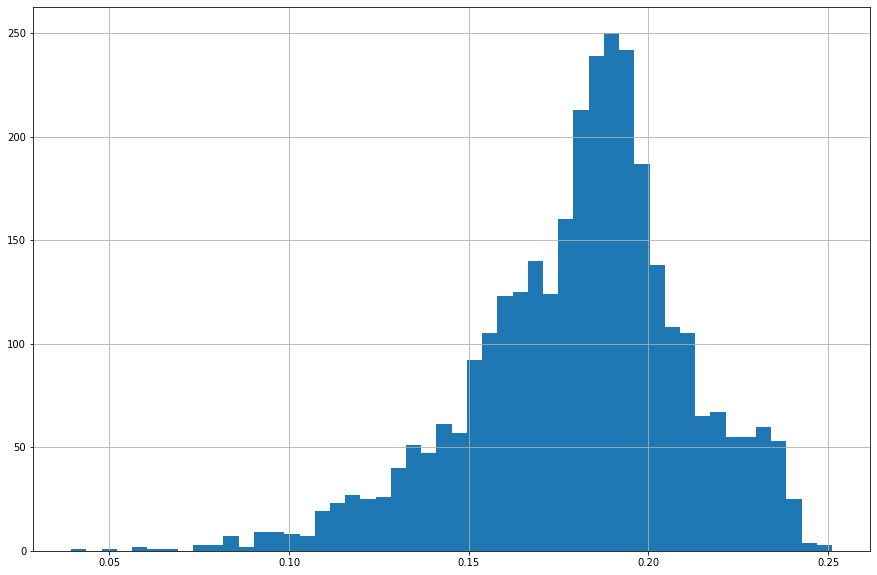

In [11]:
voices['meanfreq'].hist(figsize=(15, 10), bins=50)